In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/drive/MyDrive/drugs.project/drugsComTest_raw.csv')

In [33]:
# How many drugs do we have?
num = len(df['drugName'].unique().tolist())
print('약물 종류는',num,'개')

약물 종류는 2637 개


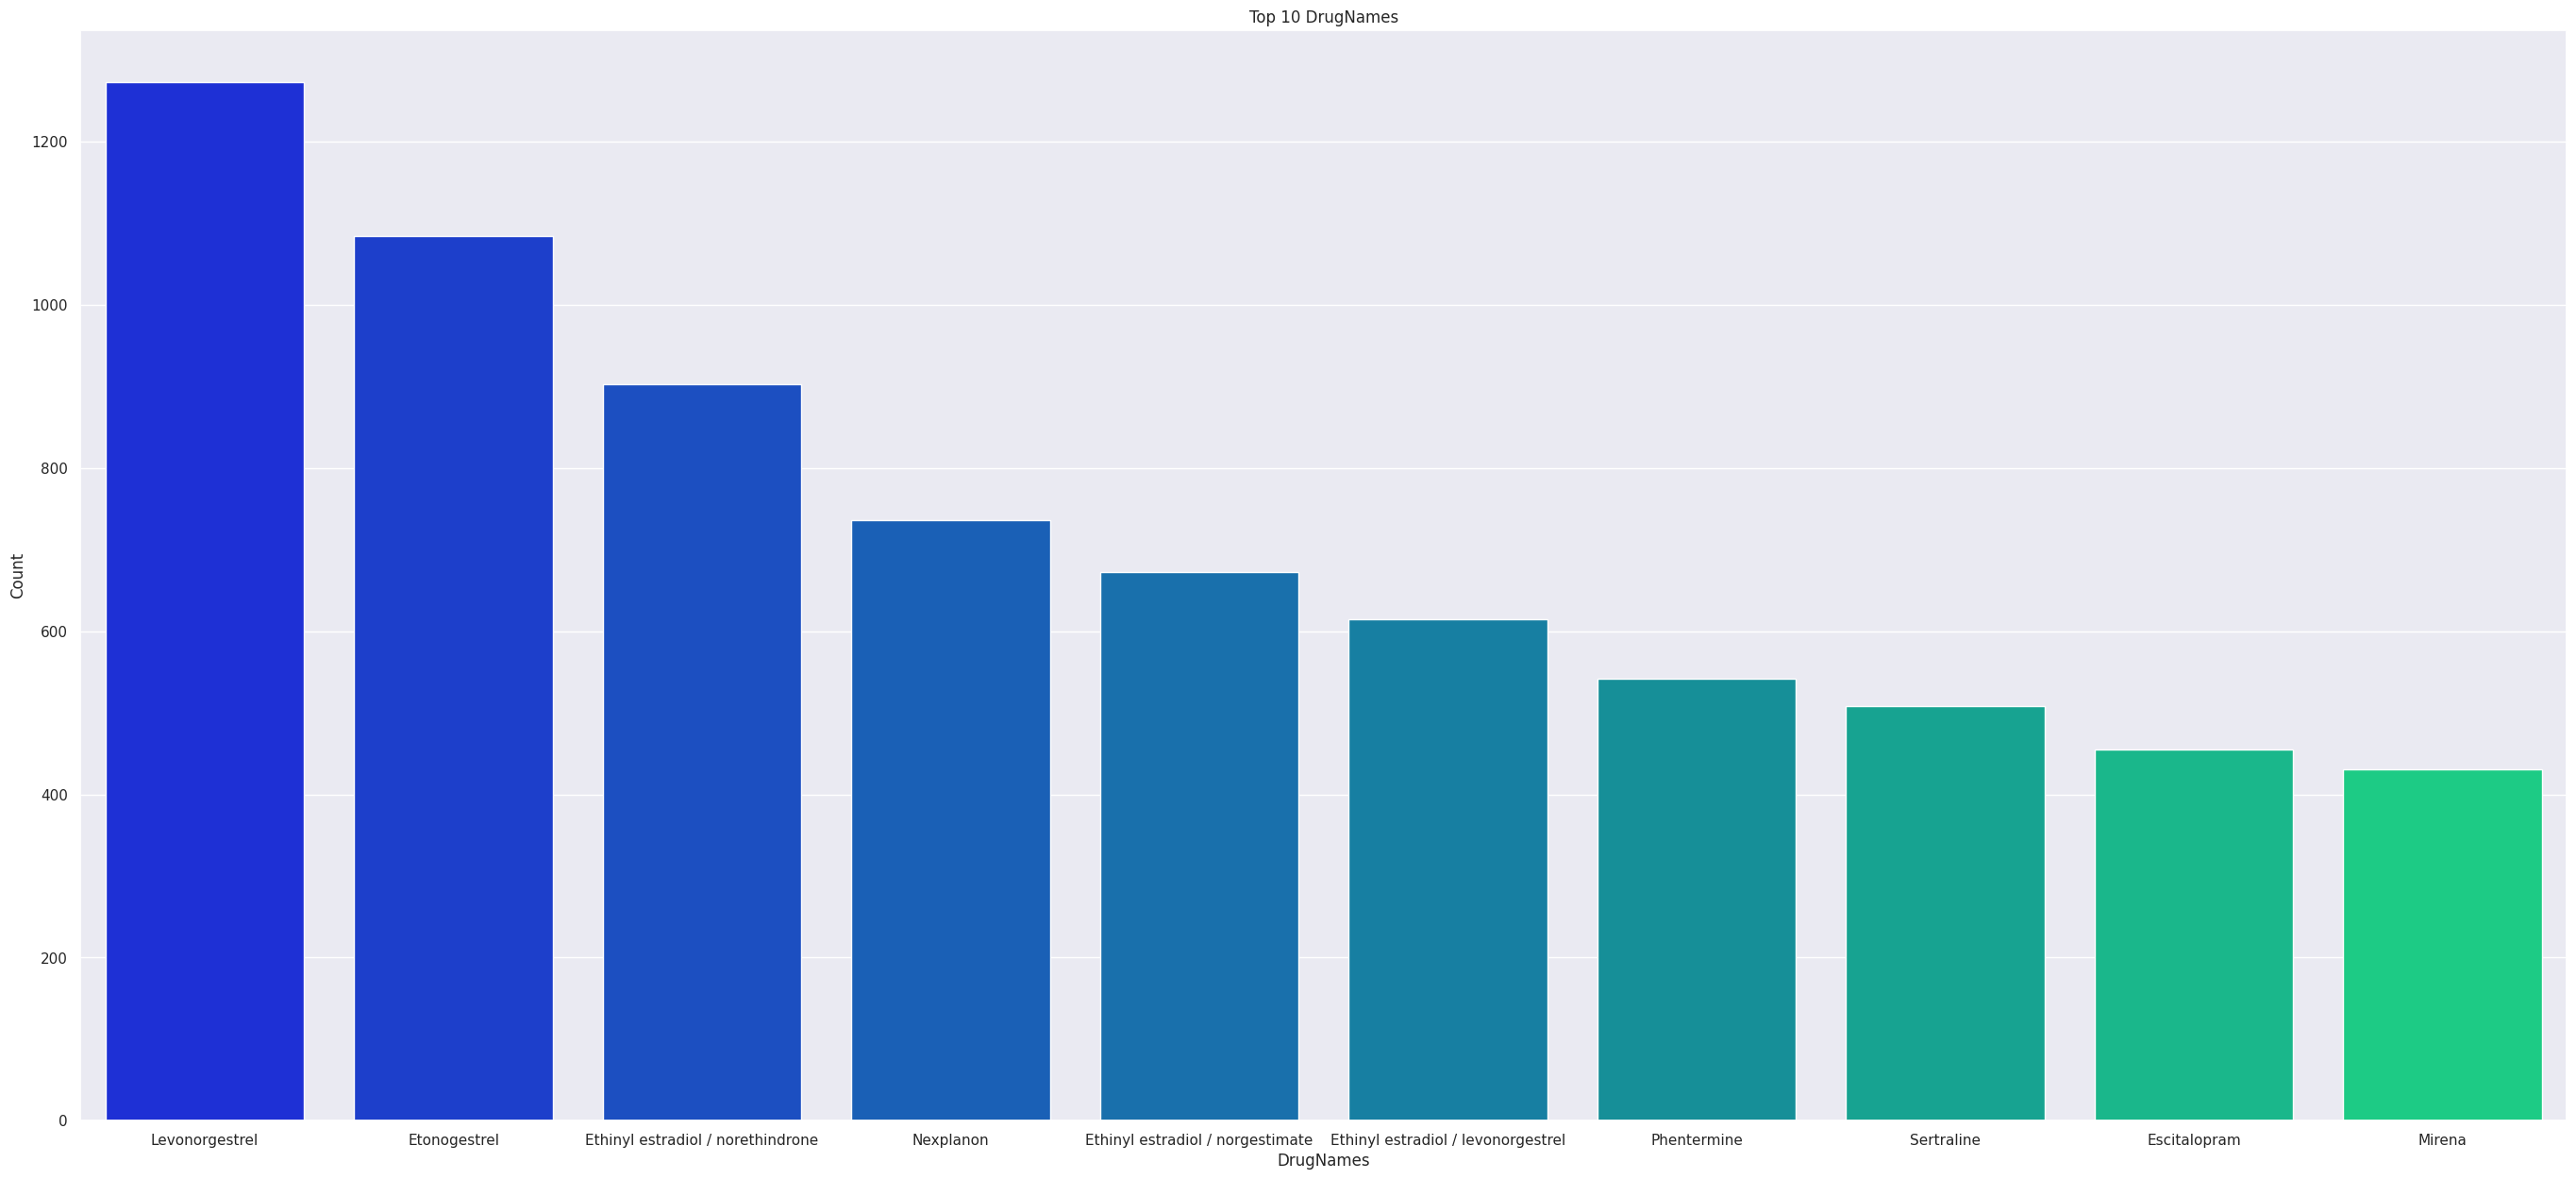

In [9]:
# top 10 drugnames
cond = dict(df['drugName'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1)
plt.rcParams['figure.figsize'] = [34, 15]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 DrugNames")
sns_.set_xlabel("DrugNames")
sns_.set_ylabel("Count");

In [34]:
num2 = len(df['condition'].unique().tolist())
print('환자 질환의 개수는', num2, '개')

환자 질환의 개수는 709 개


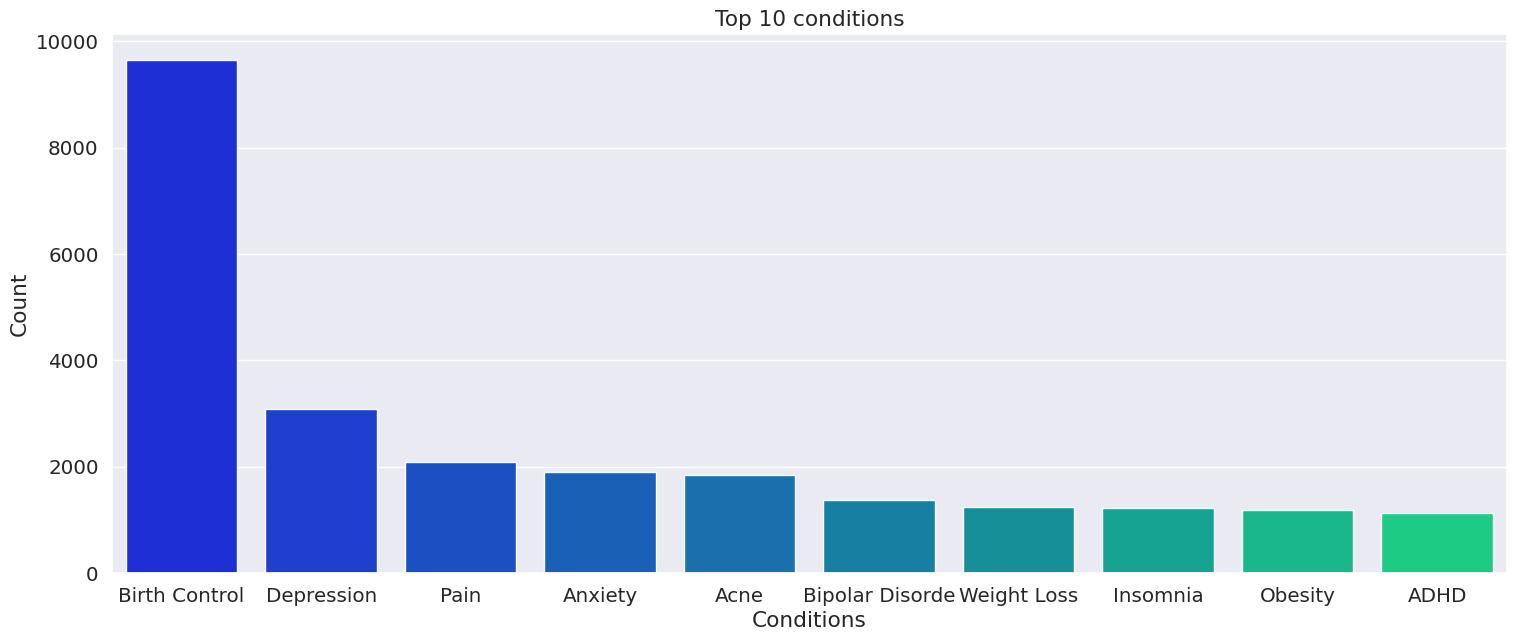

In [10]:
# top 10 conditions
cond = dict(df['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

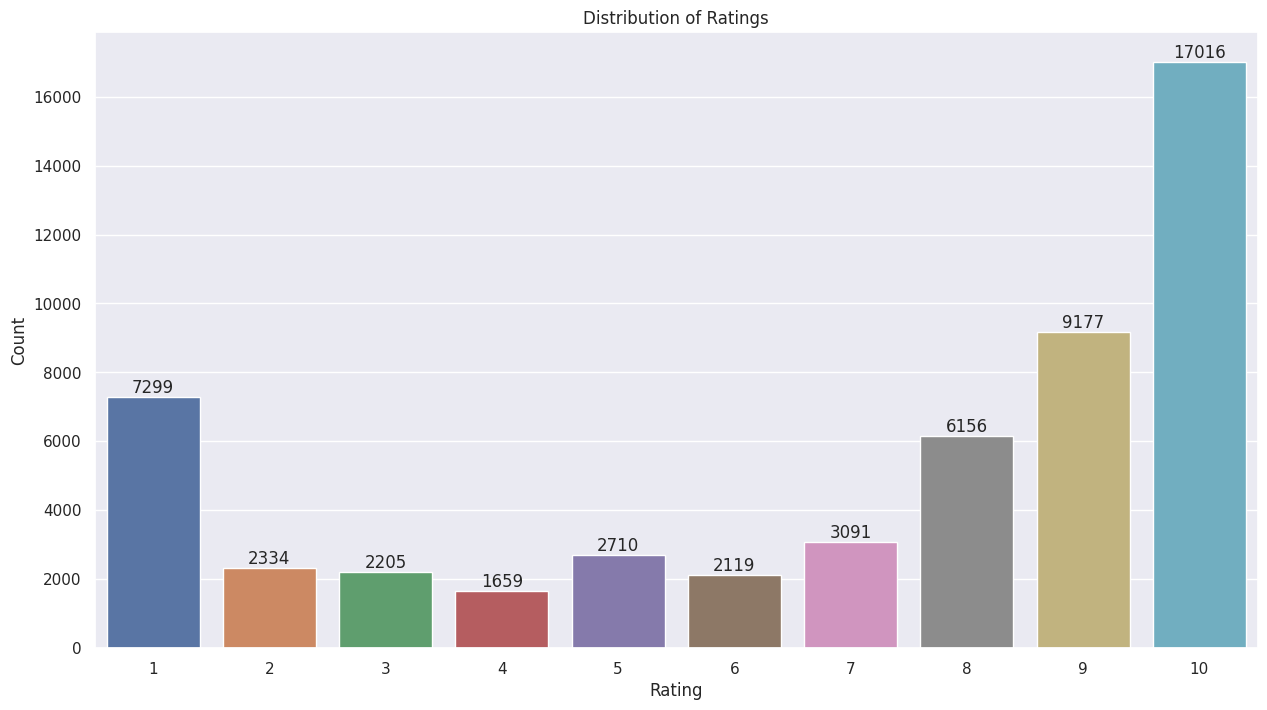

In [13]:
ax = sns.countplot(data=df, x="rating")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, '%.0f' % height,ha = 'center', va='bottom', size = 12)
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
sns.set(font_scale = 1.0, style = 'darkgrid')
plt.show()

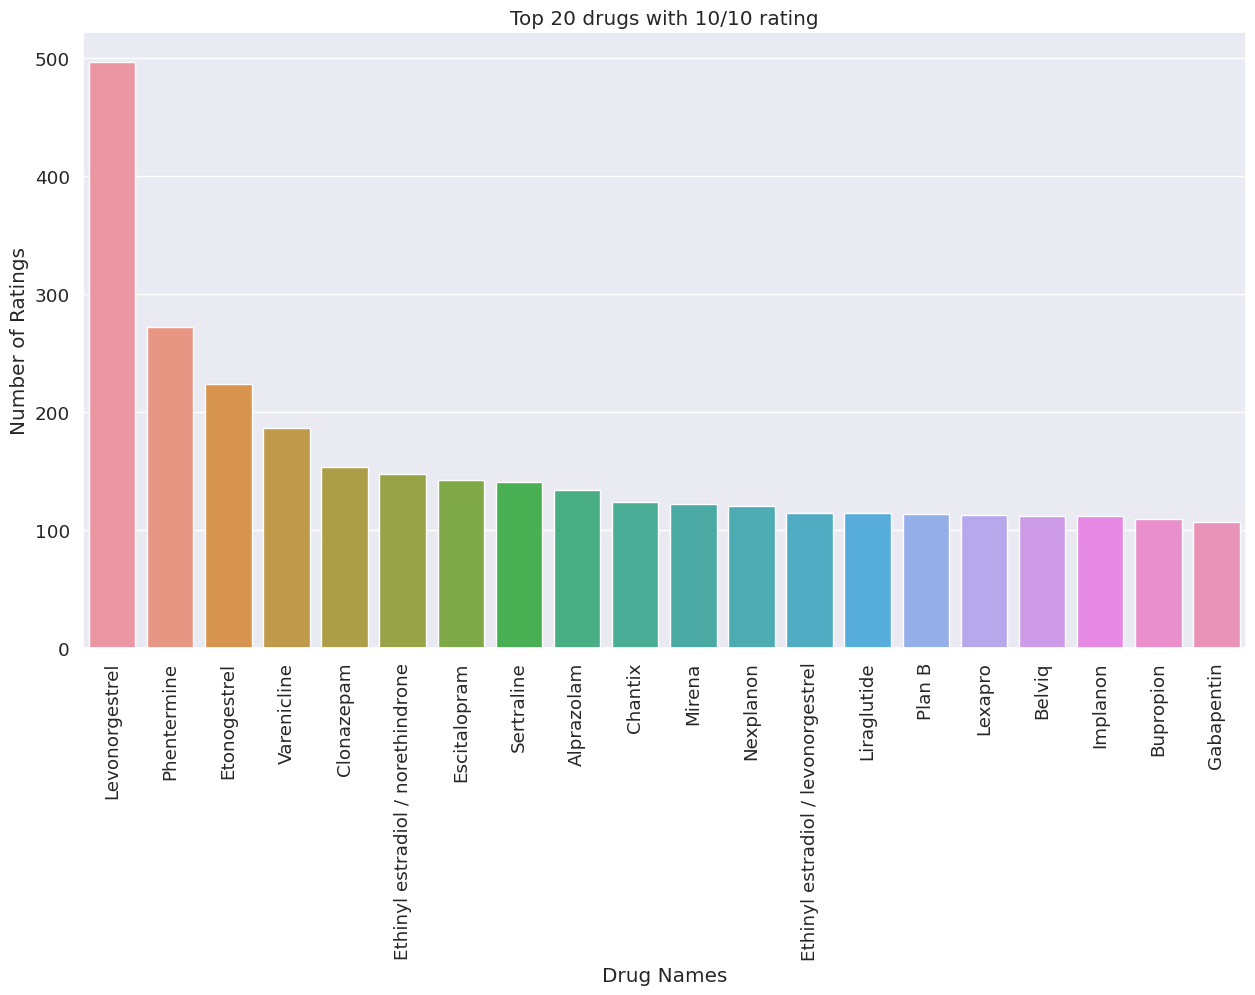

In [11]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);
plt.show()

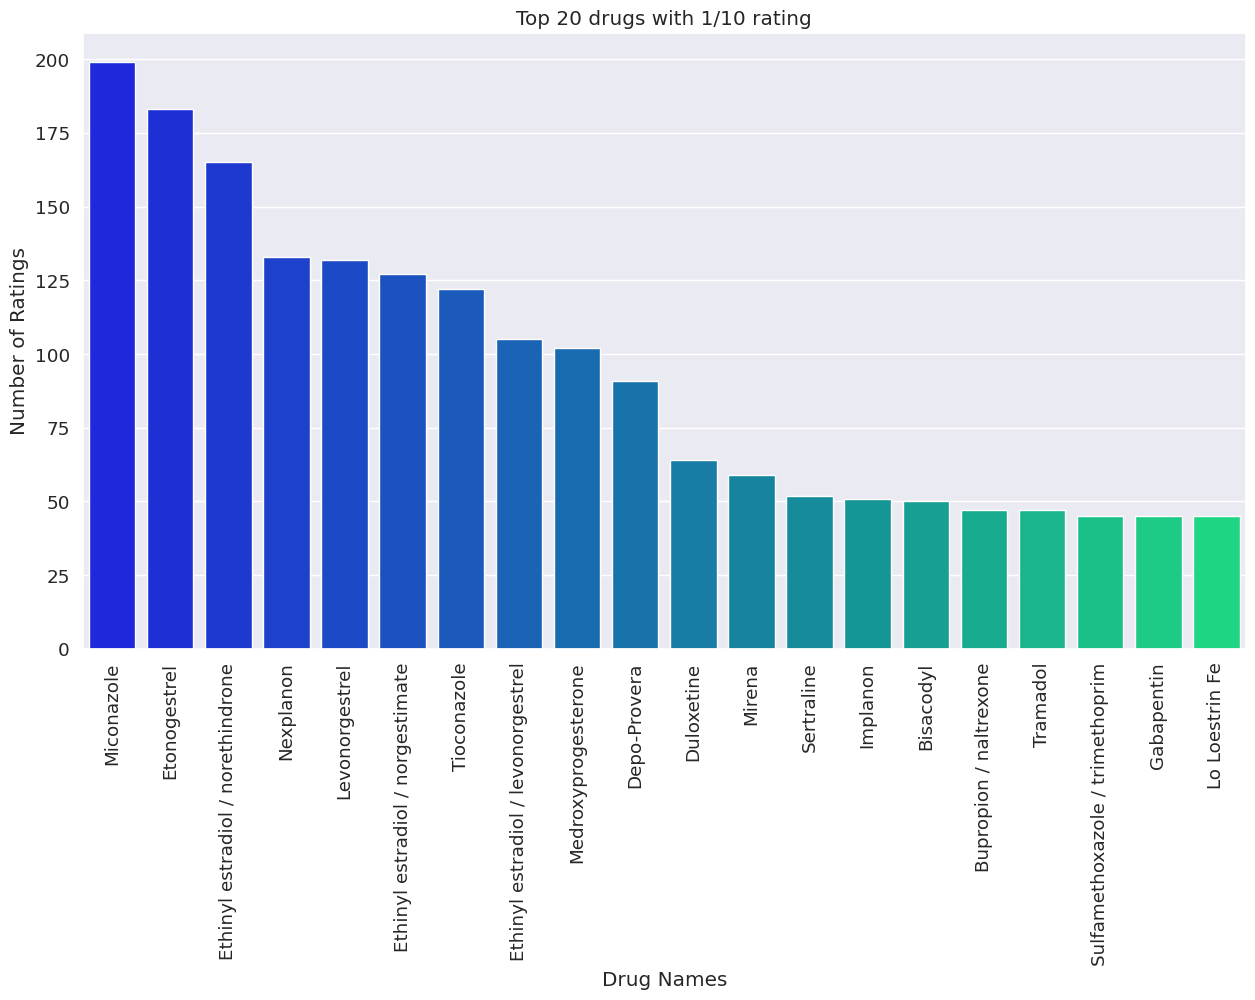

In [16]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

In [29]:
# Create a list (cast into an array) containing the average usefulness for given ratings
use_ls = []

for i in range(1, 11):
    use_ls.append([i, np.sum(df[df.rating == i].usefulCount) / np.sum([df.rating == i])])

use_arr = np.asarray(use_ls)

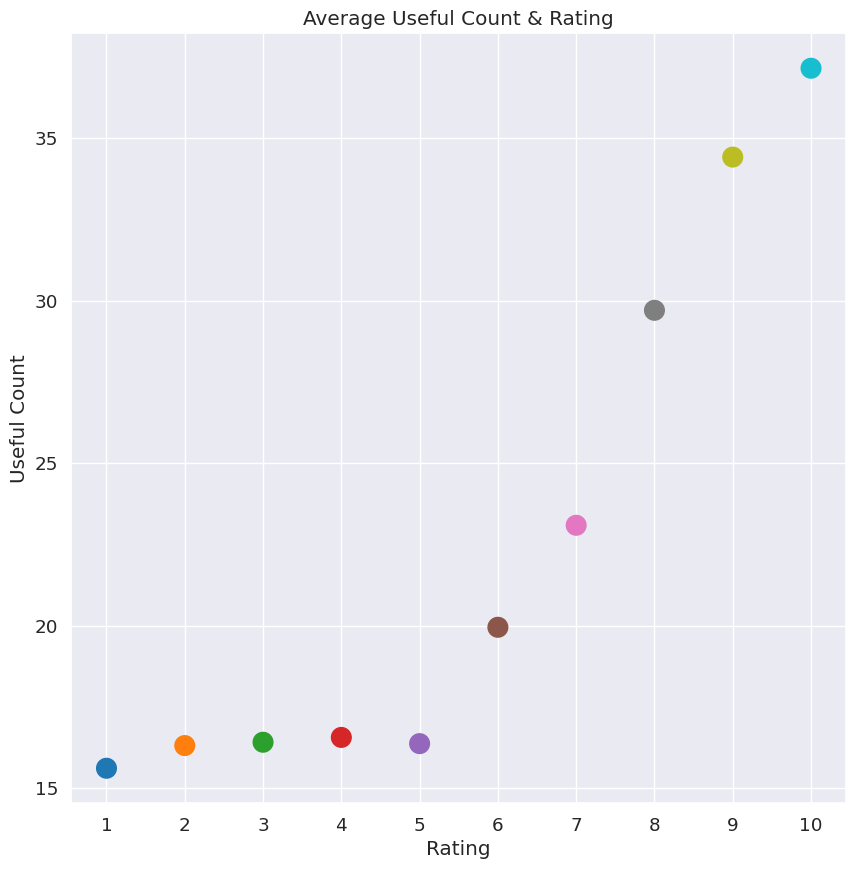

In [30]:
plt.scatter(use_arr[:, 0], use_arr[:, 1], c=use_arr[:, 0], cmap='tab10', s=200)
plt.title('Average Useful Count & Rating')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.xticks([i for i in range(1, 11)]);

In [18]:
# feature engineering
# let's make a new column review sentiment

df.loc[(df['rating'] >= 5), 'Review_Sentiment'] = 1
df.loc[(df['rating'] < 5), 'Review_Sentiment'] = 0

df['Review_Sentiment'].value_counts()

1.0    40269
0.0    13497
Name: Review_Sentiment, dtype: int64

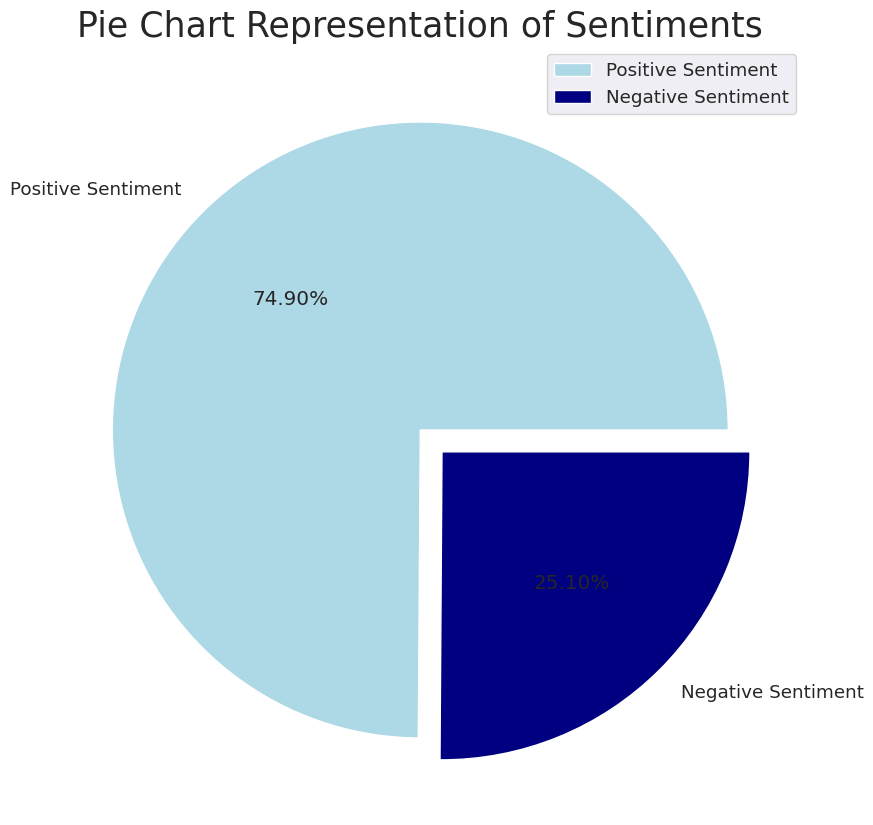

In [19]:
# a pie chart to represent the sentiments of the patients

size = [40269, 13497]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

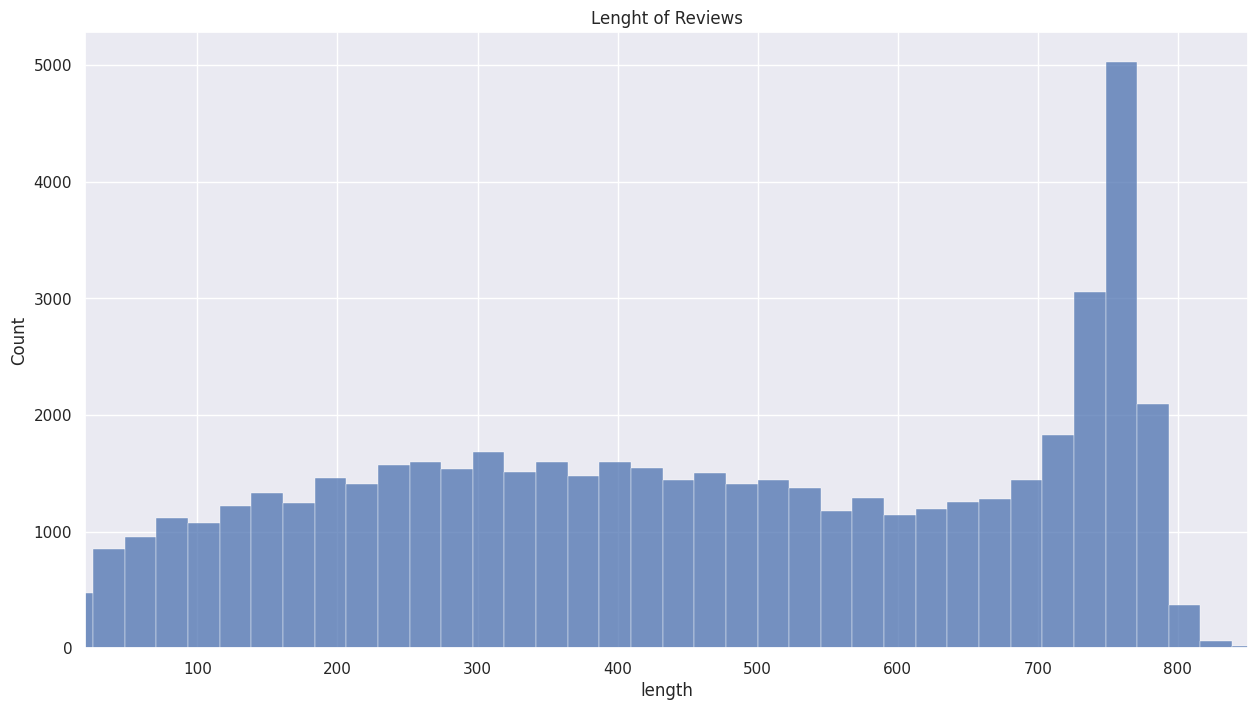

In [ ]:
df['length'] = df['review'].apply(len)
sns.histplot(df['length'])
plt.xlim([20,850])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, '%.0f' % height,ha = 'center', va='bottom', size = 12)
    plt.title('Lenght of Reviews')
    plt.xlabel('length')
    plt.ylabel('Count')
    plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

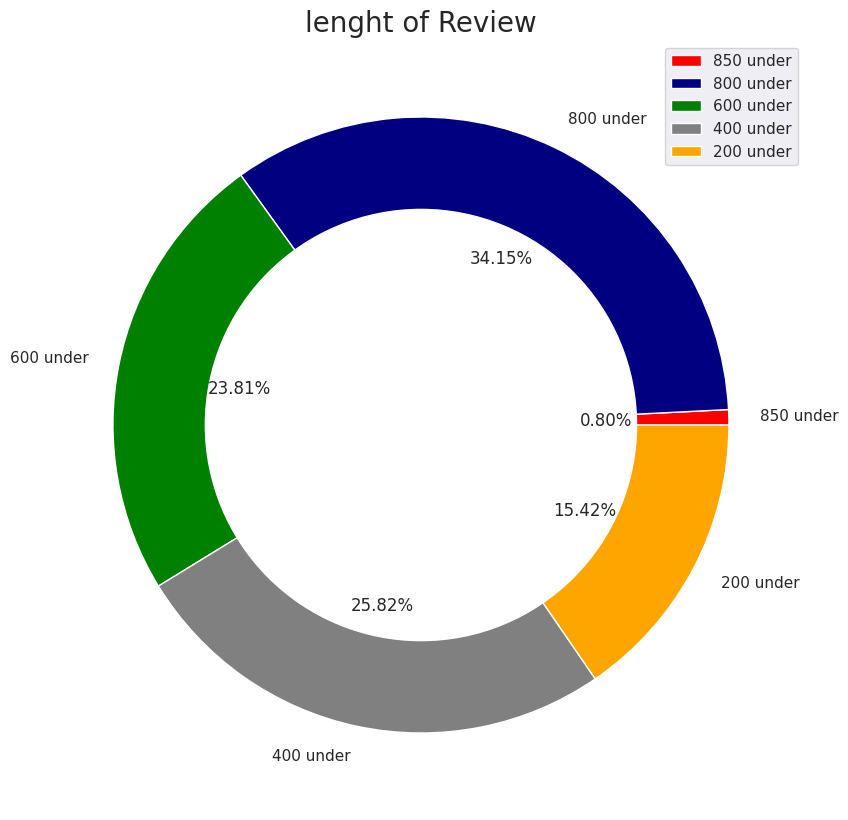

In [ ]:


size = [429,18316,12774,13849,8273,]
colors = ['red', 'navy', 'green',  'grey', 'orange']
labels = "850 under","800 under", "600 under", "400 under", "200 under"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('lenght of Review', fontsize = 20)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()